In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
main_data = pd.read_csv('demographics.csv')

In [3]:
main_data.head()

,first_name,last_name,blood_type,marriage_status,income,device
0,Abdul,Colon,A+,married,145000,AndroidOS
1,Abdul,Pierce,B+,married,85000,MacOS
2,Desirae,Pierce,B+,MARRIED,130000,iOS
3,Shannon,Gibson,A+,married,175000,MacOS
4,Desirae,Little,B+,unmarried,130000,MacOS


In [4]:
valid_blood_type_list = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']
blood_type_categories = pd.DataFrame({'blood_type': valid_blood_type_list})
print(blood_type_categories)

  blood_type
0         A+
1         A-
2         B+
3         B-
4        AB+
5        AB-
6         O+
7         O-


In [5]:
unique_blood_types_main = set(main_data['blood_type'])
valid_blood_types_set = set(blood_type_categories['blood_type'])  
bogus_blood_types = unique_blood_types_main.difference(valid_blood_types_set)
bogus_blood_types

{'C+', 'D-'}

In [6]:
bogus_records_index = main_data['blood_type'].isin(bogus_blood_types)

without_bogus_records = main_data[~bogus_records_index].copy()
without_bogus_records['blood_type'].unique()

array(['A+', 'B+', 'A-', 'AB-', 'AB+', 'B-', 'O-', 'O+'], dtype=object)

In [7]:
main_data['marriage_status'].unique()

array(['married', 'MARRIED', ' married', 'unmarried ', 'divorced',
       'unmarried', 'UNMARRIED', 'separated'], dtype=object)

In [8]:
inconsistent_data = main_data.copy()
inconsistent_data['marriage_status'] = inconsistent_data['marriage_status'].str.lower()
inconsistent_data['marriage_status'].unique()

array(['married', ' married', 'unmarried ', 'divorced', 'unmarried',
       'separated'], dtype=object)

In [9]:
inconsistent_data['marriage_status'] = inconsistent_data['marriage_status'].str.strip()

inconsistent_data['marriage_status'].unique()

array(['married', 'unmarried', 'divorced', 'separated'], dtype=object)

In [10]:
print(f"Max income - {main_data['income'].max()}, Min income - {main_data['income'].min()}")

Max income - 190000, Min income - 40000


In [11]:
income_bins = [40000, 75000, 100000, 125000, 150000, np.inf]
income_labels = ['40k-75k', '75k-100k', '100k-125k', '125k-150k', '150k+']

remapping_data = main_data.copy()
remapping_data['income_groups'] = pd.cut(
    remapping_data['income'],
    bins=income_bins,
    labels=income_labels
)

remapping_data.head()

,first_name,last_name,blood_type,marriage_status,income,device,income_groups
0,Abdul,Colon,A+,married,145000,AndroidOS,125k-150k
1,Abdul,Pierce,B+,married,85000,MacOS,75k-100k
2,Desirae,Pierce,B+,MARRIED,130000,iOS,125k-150k
3,Shannon,Gibson,A+,married,175000,MacOS,150k+
4,Desirae,Little,B+,unmarried,130000,MacOS,125k-150k


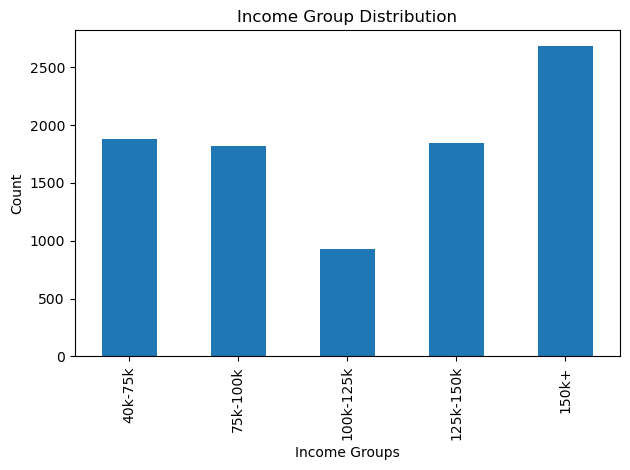

In [12]:
remapping_data['income_groups'].value_counts().sort_index().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [13]:
import random
phone_numbers = []

for i in range(100):
    number = random.randint(100000000, 9999999999)  # length can be 9 or 10 digits
    if i % 2 == 0:
        phone_numbers.append('+91 ' + str(number))  # add +91 prefix for some
    else:
        phone_numbers.append(str(number))

phone_numbers_data = pd.DataFrame({
    'phone_numbers': phone_numbers
})

phone_numbers_data.head()

,phone_numbers
0,+91 9105094403
1,5467542589
2,+91 5755912379
3,7812955205
4,+91 9405881516


In [14]:
phone_numbers_data['phone_numbers'] = phone_numbers_data['phone_numbers'].str.replace(r'\+91 ', '', regex=True)

num_digits = phone_numbers_data['phone_numbers'].str.len()

invalid_numbers_index = phone_numbers_data[num_digits < 10].index
phone_numbers_data.drop(invalid_numbers_index, inplace=True)

phone_numbers_data.dropna(inplace=True)
phone_numbers_data.reset_index(drop=True, inplace=True)

phone_numbers_data.head()

,phone_numbers
0,9105094403
1,5467542589
2,5755912379
3,7812955205
4,9405881516


In [15]:
assert not phone_numbers_data['phone_numbers'].str.contains(r'\+91 ').any(), "Found phone numbers with '+91 ' prefix"
assert (phone_numbers_data['phone_numbers'].str.len() == 10).all(), "Some phone numbers do not have 10 digits"

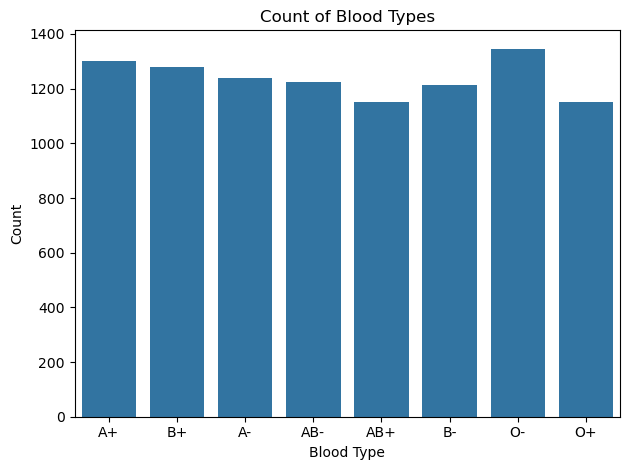

In [16]:
import seaborn as sns
sns.countplot(x='blood_type', data=without_bogus_records)
plt.title('Count of Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

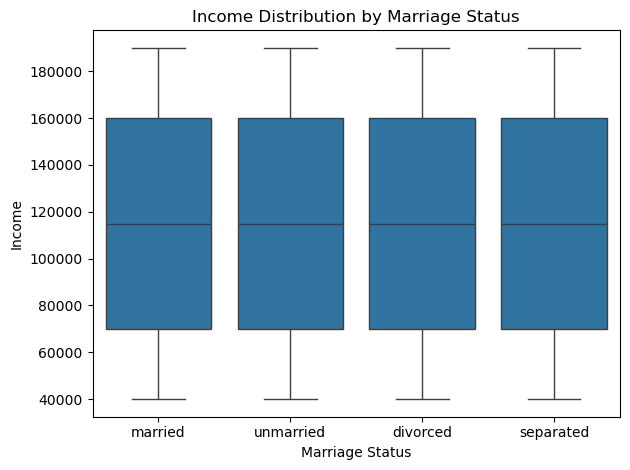

In [17]:
sns.boxplot(x='marriage_status', y='income', data=inconsistent_data)

plt.title('Income Distribution by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Income') 
plt.tight_layout()
plt.show()

## Encoding Categorical Data

In [18]:
le = LabelEncoder()
without_bogus_records['blood_type_encoded'] = le.fit_transform(without_bogus_records['blood_type'])

without_bogus_records[['blood_type', 'blood_type_encoded']].drop_duplicates()

,blood_type,blood_type_encoded
0,A+,0
1,B+,4
5,A-,1
7,AB-,3
9,AB+,2
10,B-,5
12,O-,7
21,O+,6


In [19]:
inconsistent_data = pd.get_dummies(inconsistent_data, columns=['marriage_status'])
inconsistent_data.head()

,first_name,last_name,blood_type,income,device,marriage_status_divorced,marriage_status_married,marriage_status_separated,marriage_status_unmarried
0,Abdul,Colon,A+,145000,AndroidOS,False,True,False,False
1,Abdul,Pierce,B+,85000,MacOS,False,True,False,False
2,Desirae,Pierce,B+,130000,iOS,False,True,False,False
3,Shannon,Gibson,A+,175000,MacOS,False,True,False,False
4,Desirae,Little,B+,130000,MacOS,False,False,False,True


In [20]:
custom_map = {
    '40k-75k': 1,
    '75k-100k': 2,
    '100k-125k': 3,
    '125k-150k': 4,
    '150k+': 5
}

remapping_data['income_groups_encoded'] = remapping_data['income_groups'].map(custom_map)

remapping_data[['income', 'income_groups', 'income_groups_encoded']].head()

,income,income_groups,income_groups_encoded
0,145000,125k-150k,4
1,85000,75k-100k,2
2,130000,125k-150k,4
3,175000,150k+,5
4,130000,125k-150k,4
